<a href="https://colab.research.google.com/github/Sirada99/CE888/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def boostrap_mean(sample, sample_size, n_iterations):
  new_samples=np.random.choice(sample,(n_iterations,sample_size),replace=True)
  data_mean=np.mean(new_samples)
  mean_list=[]
  for i in range(len(new_samples)):
    up_sample=new_samples[i,:]
    sample_mean=np.mean(up_sample)
    mean_list.append(sample_mean)

  alpha=0.95
  p = ((1.0-alpha)/2.0) * 100
  lower = np.percentile(mean_list, p)
  p = (alpha+((1.0-alpha)/2.0)) * 100
  upper = np.percentile(mean_list, p)
  return data_mean, lower, upper


(0, 100000)

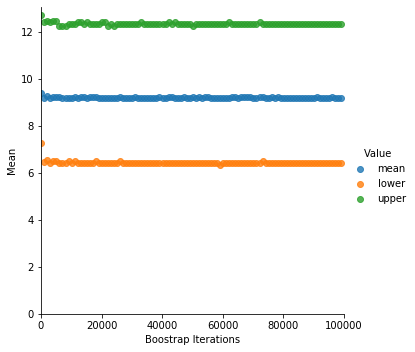

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000): #start from 100 to 100000 increase 1000 at a time(100,1100,2100,3100,...)
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
  new_samples=np.random.choice(sample,(iterations,sample_size),replace=True)
  data_mean=np.mean(new_samples)
  mean_list=[]
  for i in range(len(new_samples)):
    up_sample=new_samples[i,:]
    sample_mean=np.mean(up_sample)
    mean_list.append(sample_mean)

  alpha=ci/100
  p = ((1.0-alpha)/2.0) * 100
  lower = np.percentile(mean_list, p)
  p = (alpha+((1.0-alpha)/2.0)) * 100
  upper = np.percentile(mean_list, p)
  return data_mean, lower, upper

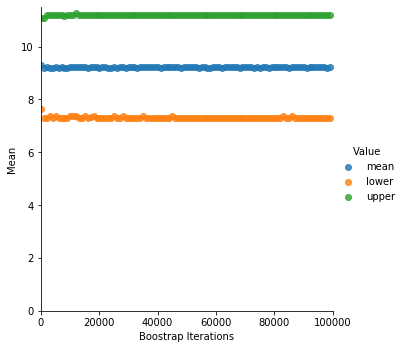

In [6]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

In [0]:
#For vehicles data
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

In [0]:
def perm_test(df, no):
    df1=df.values.T[0]
    df2=df.values.T[1]
    newdf2= df2 [np.logical_not(np.isnan(df2))]
    concat = np.concatenate((df1, newdf2))
    meandf1=np.mean(df1)
    meandf2=np.mean(newdf2)
    tobs=np.abs(np.mean(newdf2)-np.mean(df1))
    k=0
    for j in range(no):
        perm = np.random.permutation(concat)
        pold = perm[:int(len(perm)-79)]
        pnew = perm[int(len(perm)-79):]
        k += tobs < np.abs(np.mean(pnew) - np.mean(pold))
    pval=k / no
    if pval<0.05:
        print("Reject H0") 
    else:
        print("There is no evidence to reject H0") 

In [12]:
perm_test(df, 3000)

Reject H0
